<a href="https://colab.research.google.com/github/dayanandv/Dynamic-Graphs_Evolutionary-IM/blob/master/Dynamic_Graphs_Evolutionary_IM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Author: Dayanand V (CB.EN.D*CSE17003-PT)

This is an attempt to model *Evolutionary IM experiment on dynamically evolving random graphs*

Reference: The paper 'Modeling multi-source information diffusion: A graphical evolutionary game approach' by Hong Hu, Yuejiang Li, H.V Zhao and Yan Chen at 2019 Asia-Pacific Signal and Information Processing Association Annual Summit and Conference, APSIPA ASC 2019.

In [ ]:
import networkx as nx
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import trange, tqdm, tqdm_notebook
from itertools import cycle
import numpy as np

In [ ]:
N = 2000    #Number of users
k = 2      #Average degree
p = k/N     #Probability that a node connects with any of it's arbitrary neighbour, might be same as the alpha (selection parametr) mentioned in the paper
G_N = 40    #Number of times the graph has to be regenerated
S_M = 100  #Number of times simulations have to be conducted on one graph
payoff_matrix = [[0.4, 0.48, 0.48, 0.64], [0.48, 0.24, 0.64, 0.32], [0.48, 0.64, 0.24, 0.32], [0.64, 0.32, 0.32, 0.2]] #Initialized based on Equation (26)
strategy_percentages = [0.1, 0.2, 0.3, 0.4] #Taking advantage of the index here, there are four strategies, viz 0, 1, 2, and 3
final_results = (strategy_percentages)
no_of_iterations = 0
change_percentage_nodes = 0.001 #Percentage of node changes expected in a graph per iteration (Dynamicity)
change_percentage_edges = 0.001 #Percentage of changes expected in a graph per iteration (Dynamicity)

In [ ]:
def update_strategy_percentage(G):
    strategy_counts = [0, 0, 0, 0]
    for user in list(G.nodes()):
        strategy_counts[int(G.nodes[user]['strategy'])] += 1
    return [count / N for count in strategy_counts]

In [ ]:
#Initializes the user strategy according to the strategy_percentages fractions for 'number_of_nodes' users with id starting from start_id
def initialize_strategies(start_id, number_of_nodes):
    strategies = np.random.choice(4, number_of_nodes, p=strategy_percentages)
    print("Number of nodes =", number_of_nodes, "Strategies = ", strategies)
    for iter in range(number_of_nodes): #For each user, do
        G.nodes[start_id+iter]['strategy'] = strategies[iter] # 1.1 Initialize users' strategy
        G.nodes[start_id+iter]['fitness'] = payoff_matrix[strategies[iter]][strategies[iter]] # 1.2 Calculate each user's fitness value

In [ ]:
for i in tqdm_notebook(range(G_N),desc='Graphs'): #Regerate graphs G_N times
    G = nx.erdos_renyi_graph(N, p, seed = 100) #Generating random graph
    intermediate_results = [strategy_percentages] #List to store strategy percentages of each simulation on this graph, initialize it with the default values
    current_strategy_percentages = strategy_percentages
    initialize_strategies(0, N) #Initialize the user strategy according to the strategy_percentages fractions for the entire graph

    for j in tqdm_notebook(range(S_M), desc='Simulations', leave=False):  #Simulation running S_M times
        
        no_of_iterations += 1

        #------------------------------------Graph evolves here--------------------------------------------------
        #----------Introducing new nodes into the graph and connecting them----------
        node_count = G.number_of_nodes()
        for k in range(int(node_count*change_percentage_nodes)):
            node_id = node_count+k
            G.add_node(node_id) #Add a new node with id continuing from last added id
            G.add_edges_from(zip(cycle([node_id]), random.sample(G.nodes(),int(p*N)))) #Create edges from the newly added node to other nodes in the graph with probability 'p' 
        initialize_strategies(start_id=node_count, number_of_nodes=k+1) #Initialize the strategies for the newly added nodes
        node_count = G.number_of_nodes()
        #----------------------------------------------------------------------------

        #---------------Removing nodes from the current graph------------------------
        #----------------------------------------------------------------------------

        #------------------Adding edges to the current graph-------------------------
        #----------------------------------------------------------------------------

        #---------------Removing edges from the current graph------------------------
        #----------------------------------------------------------------------------

        #--------------------------------------------------------------------------------------------------------

        user = random.choice(list(G.nodes())) # 2. Choose a focal user randomly
        if (len([n for n in G.neighbors(user)])!=0): #If the user has neighbors
            neighbor = random.choice(list(G.neighbors(user))) # 3. Choose a neighbor to replicate the strategy
        else:
            continue

        if (G.nodes[user]['strategy'] == G.nodes[neighbor]['strategy']): # 4. If neighbor's strategy is same as focal user's
            #strategy[s]['percentage'] = '''calculated value''' #Unclear what this means if it's the same value
            pass
        else:
            G.nodes[user]['strategy'] = G.nodes[neighbor]['strategy'] # 4.1 Update the strategy of focal user to that of neighbor's
            G.nodes[user]['fitness'] = payoff_matrix[G.nodes[user]['strategy']][G.nodes[neighbor]['strategy']] # 4.2 Re-calculate fitness 
        current_strategy_percentages = update_strategy_percentage(G) # 5 Record each strategy's percentage
        intermediate_results.append(current_strategy_percentages)
        print("Intermediate results:", intermediate_results)

    ###print("After Simulation #",k+1, "strategy values are:", current_strategy_percentages) # 6. Record/Output the simulation experiment's results
    intermediate_results_df = pd.DataFrame(intermediate_results)
    final_results.append(intermediate_results_df.mean(axis = 0)) # Append each strategy's average percentage values in this simulation to the final result collection
final_results_df = pd.DataFrame(final_results)
final_results.columns=['s0','s1','s2','s3']
#final_results.to_csv("results_" + time.strftime("%H%M%S_%d%m%Y") + ".csv", index=True, index_label='iteration') # 8. Record/Output the final average results

Number of nodes = 2000 Strategies =  [0 1 1 ... 3 3 1]


Number of nodes = 2 Strategies =  [0 3]
Intermediate results: [[0.1, 0.2, 0.3, 0.4], [0.0945, 0.196, 0.3005, 0.41]]
Number of nodes = 2 Strategies =  [1 1]
Intermediate results: [[0.1, 0.2, 0.3, 0.4], [0.0945, 0.196, 0.3005, 0.41], [0.0945, 0.1975, 0.3005, 0.4095]]
Number of nodes = 2 Strategies =  [0 2]
Intermediate results: [[0.1, 0.2, 0.3, 0.4], [0.0945, 0.196, 0.3005, 0.41], [0.0945, 0.1975, 0.3005, 0.4095], [0.095, 0.1975, 0.3005, 0.41]]
Number of nodes = 2 Strategies =  [2 3]
Intermediate results: [[0.1, 0.2, 0.3, 0.4], [0.0945, 0.196, 0.3005, 0.41], [0.0945, 0.1975, 0.3005, 0.4095], [0.095, 0.1975, 0.3005, 0.41], [0.095, 0.1975, 0.3015, 0.41]]
Number of nodes = 2 Strategies =  [2 3]
Intermediate results: [[0.1, 0.2, 0.3, 0.4], [0.0945, 0.196, 0.3005, 0.41], [0.0945, 0.1975, 0.3005, 0.4095], [0.095, 0.1975, 0.3005, 0.41], [0.095, 0.1975, 0.3015, 0.41], [0.095, 0.1975, 0.302, 0.4105]]
Number of nodes = 2 Strategies =  [3 2]
Intermediate results: [[0.1, 0.2, 0.3, 0.4], [0.0945, 0.1

ValueError: ignored

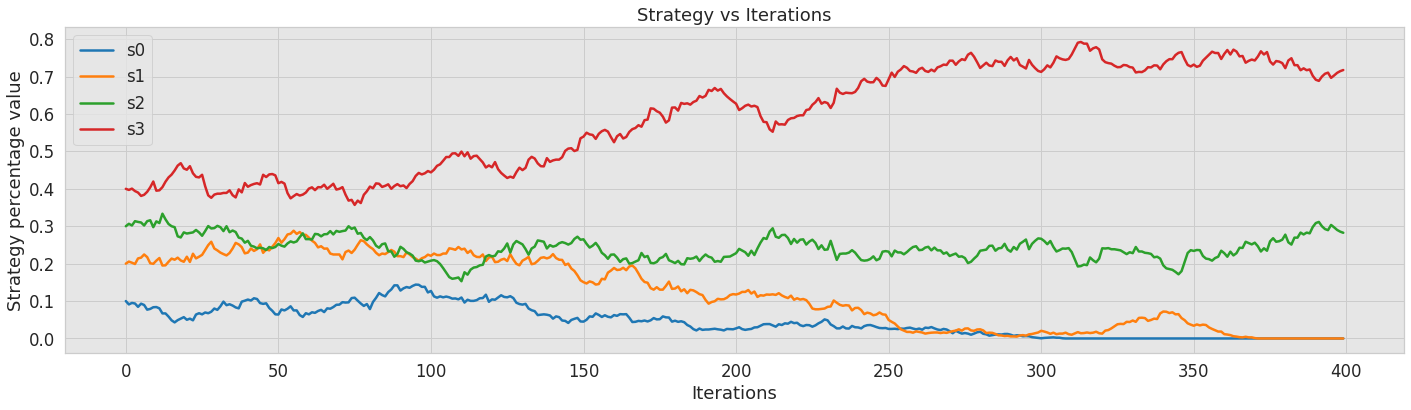

In [ ]:
plt.figure(figsize=(24, 6))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
plt.xlabel("Iterations")
plt.ylabel("Strategy percentage value")
plt.title("Strategy vs Iterations")
sns.lineplot(data=final_results, dashes=False)

In [ ]:
a = [[0, 1, 2, 3]]
b = a.append([4, 5, 6, 7])
print(a)
c = pd.DataFrame(a)
print(c)
d = []
d.append(c.mean(axis = 0)) 
e = pd.DataFrame(d)
print(e)

[[0, 1, 2, 3], [4, 5, 6, 7]]
   0  1  2  3
0  0  1  2  3
1  4  5  6  7
     0    1    2    3
0  2.0  3.0  4.0  5.0
